# Análise de Dados - Titanic

Informações retiradas da [competição](https://www.kaggle.com/c/titanic/overview) de análise de dados sobre o passageiros do Titanic.

Este notebook será realizado a aplicação dos estudos realizados com:
- Python
- Pandas
- Numpy
- Matplotlib
- Seaborn

A ideia do projeto é fazer uma análise de dados dos datasets do Titanic e verifcar o que conseguimos extrair de informações.

In [1]:
# Importanto as bibliotecas
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# importanto o arquivo
df_list_passenger =  pd.read_csv('Arquivos/Titanic/train.csv', sep=',')

### Informações sobre a base de dados

Data Dictionary

**survival:**	0 = No, 1 = Yes

**pclass:**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

**sex:**	Sex	

**Age:**	Age in years	

**sibsp:**	# of siblings / spouses aboard the Titanic	

**parch:**	# of parents / children aboard the Titanic

**ticket:**	Ticket number	

**fare:**	Passenger fare	

**cabin:**	Cabin number	

**embarked:**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton



In [3]:
# lendo o arquivo de passageiros
df_list_passenger.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Verificando o tamanho do dataset de passageiros
df_list_passenger.shape

(891, 12)

In [5]:
# Informações básicas de estatísticas
df_list_passenger.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Gerando algumas informações a respeito do DataSet
df_list_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Alguns insights visualizando as informações do dataset:
- A **Coluna Age** está com 177 valores vazio.
- A **Coluna Cabin** só possui 204 linhas preenchidas.
- Apenas 2 passageiros não tem informações na **Coluna Embarked** 
- Segundo as informações sobre a base de dados, podemos trabalhar colunas como **Sex, Embarked, Survived e Pclass** com o tipo categórico.

Teremos que tratar o dataset antes de começar a realizar uma análise mais detalhada.

1- Mudar os tipos das colunas

2- Removendo colunas que não serão utilizadas nas análises.

3- Preencher os campos que estão vazio.

In [7]:
# Transformando a colunas Sex, Embarked, Survived e Pclass para categorical
colunas = {'Sex': 'category', 'Embarked' : 'category', 'Survived' : 'category', 'Pclass' : 'category'}
df_list_passenger = df_list_passenger.astype(colunas)

In [8]:
# Verificando a mudança do Dtype das colunas
df_list_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


In [9]:
# Removendo colunas que não serão utilizadas na análise
# A coluna Cabin além de estar incompleta, não será necessária para nossas análises.
df_list_passenger.drop('Cabin', axis=1, inplace=True)

In [10]:
# Confirmando a remoção da coluna Cabin
df_list_passenger.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
# Verificando os campos vazios
df_list_passenger.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
# Verificando os campos vazios da coluna Embarked
df_list_passenger[df_list_passenger['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Uma rápida pesquisa na internet identificamos que [Amelie Icard](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) era empregada da [Mrs George Nelson Stone](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html), identificamos também que ambas embarcaram em **Southampton** 

In [13]:
# Adicionando o local de embarque para todos os valores nulos adicionar o valor 'S' de Southampton
df_list_passenger['Embarked'].fillna('S', inplace=True)

In [14]:
# Verificando o preenchimento
df_list_passenger[(df_list_passenger['PassengerId'] == 62) | (df_list_passenger['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


In [15]:
# Listando novamente os valores vazios.
df_list_passenger.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
# Uma rápida e básica análise estatística do campo Age
df_list_passenger['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Podemos procurar 1 a 1 os valores faltantes, dependendo da quantidade de valores faltantes, isso se torna inviável.

Outra solução é apagar os registros que contenham valores faltantes, porém iríamos perder 177 registros que podem fazer falta na nossa análise.

A solução que usaremos é preencher os valores faltantes pela **média** dos valores da coluna, assim não afetaremos o valor da média com os campos faltantes.

In [17]:
# Preenchendo os valores de idade com a média da idade
df_list_passenger['Age'].fillna(df_list_passenger['Age'].mean(), inplace=True)

In [18]:
df_list_passenger.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# Transformando as categorias da Coluna Pclass
classes = {1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'}
df_list_passenger['Pclass'].replace(classes, inplace=True)

In [20]:
# Transformando as categorias da Coluna Survived
survived = {0 : 'No', 1 : 'Yes'}
df_list_passenger['Survived'].replace(survived, inplace=True)

In [21]:
# Transformando as categorias da Coluna Embarked
cidades = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'}
df_list_passenger['Embarked'].replace(cidades, inplace=True)

In [22]:
df_list_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    object  
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 70.7+ KB


In [23]:
# Apresentando o Dataset todo preparado para trabalharmos nas análises
df_list_passenger.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3rd Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Yes,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Yes,3rd Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Yes,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,No,3rd Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


Pronto! Agora não temos valores nulos no nosso Dataset, vamos para as análises.

# Utilizando Seaborn para visualização dos dados

In [24]:
df_list_passenger.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3rd Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Yes,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Yes,3rd Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Yes,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,No,3rd Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


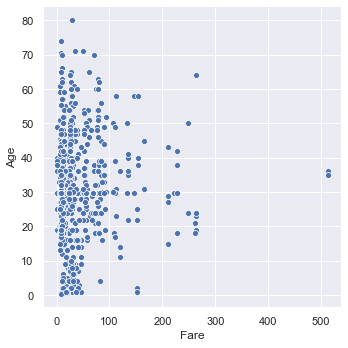

In [25]:
# Relacionando Age com Fare
sns.set(color_codes=True)
sns.relplot(x='Fare', y='Age', data=df_list_passenger)

- Identificamos que a maioria das Taxas paga pelos passageiros estão entre 0 a 100 Dolares.

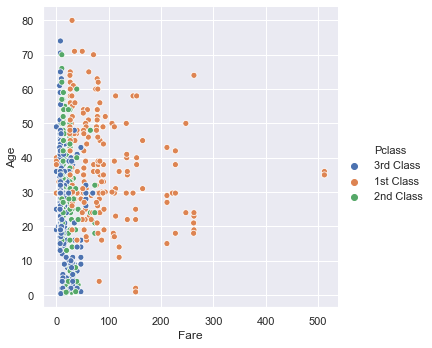

In [26]:
# Relação Fare com Age, separando por Classe
sns.relplot(x='Fare', y='Age', hue='Pclass', data=df_list_passenger)

- As pessoa da **1st Class** foram os que pagaram as maiores taxas.

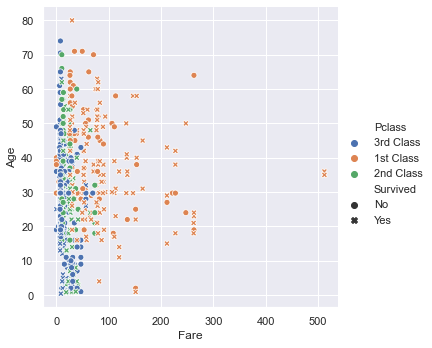

In [27]:
# Relação Fare com Age, separando por Classe e identificando quem sobreviveu
sns.relplot(x='Fare', y='Age', hue='Pclass', style='Survived', data=df_list_passenger)

- Gráfico um pouco confuso, vamos tentar aumentar um pouco a imagem.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

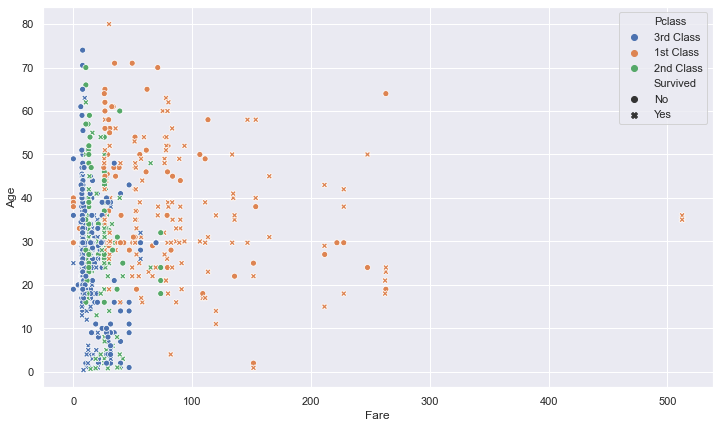

In [28]:
f, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x='Fare', y='Age', hue='Pclass', style='Survived', data=df_list_passenger)

- Melhorou, mas ainda não é o ideal.
- Vamos trabalhar com os dados categóricos.

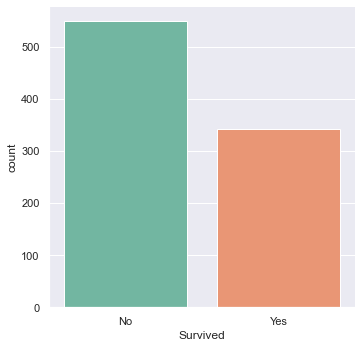

In [29]:
sns.set_palette('Set2')
# Contar os passageiros por sobrevivente
sns.catplot(x='Survived', kind='count', data=df_list_passenger)

In [30]:
nao_sobreviventes = df_list_passenger[df_list_passenger['Survived'] == 'No']
sobreviventes = df_list_passenger.loc[(df_list_passenger['Survived'] == 'Yes')]
print('Não sobreviventes:',len(nao_sobreviventes))
print('Sobreviventes:',len(sobreviventes))

Não sobreviventes: 549
Sobreviventes: 342


- A **maioria dos passageiros** não sobreviveu ao naufrágio, um total de **549** pessoas.

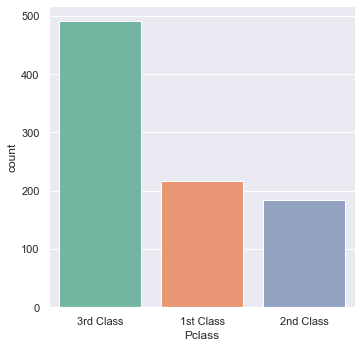

In [31]:
# Contar os passageiros por Pclass
sns.catplot(x='Pclass', kind='count', data=df_list_passenger)

In [32]:
primeira_classe = df_list_passenger.loc[(df_list_passenger['Pclass'] == '1st Class')]
secunda_classe = df_list_passenger.loc[(df_list_passenger['Pclass'] == '2nd Class')]
terceira_class = df_list_passenger.loc[(df_list_passenger['Pclass'] == '3rd Class')]

print('Total de passageiros da primeira classe:', len(primeira_classe))
print('Total de passageiros da segunda classe:', len(secunda_classe))
print('Total de passageiros da terceira classe:', len(terceira_class))

Total de passageiros da primeira classe: 216
Total de passageiros da segunda classe: 184
Total de passageiros da terceira classe: 491


- A maioria dos passageiros são da **3rd Class**, totalizando 491 passageiros.
- Seguido dos passageiros da **1st Class**, 216 passageiros.
- E por último os passageiros da **2nd Class**, 184 passageiros.

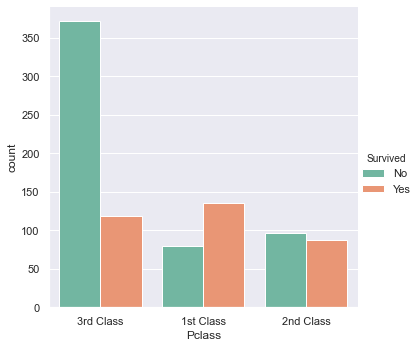

In [33]:
# Contar os passageiros por Pclass dividos por Survived
sns.catplot(x='Pclass', hue='Survived', kind='count', data=df_list_passenger)

In [34]:
sobreviventes_primeira_classe = sobreviventes[sobreviventes['Pclass'] == '1st Class']
nao_sobreviventes_terceira_classe = nao_sobreviventes[nao_sobreviventes['Pclass'] == '3rd Class']
print('Sobreviventes da Primeira Classe:', len(sobreviventes_primeira_classe))
print('Mortos da Terceira Classe:', len(nao_sobreviventes_terceira_classe))

Sobreviventes da Primeira Classe: 136
Mortos da Terceira Classe: 372


- Maioria das pessoas que não sobreviveu eram da **3rd Class**, total de **372** pessoas.
- Sobreviveran **136** pessoas da **1st Class**

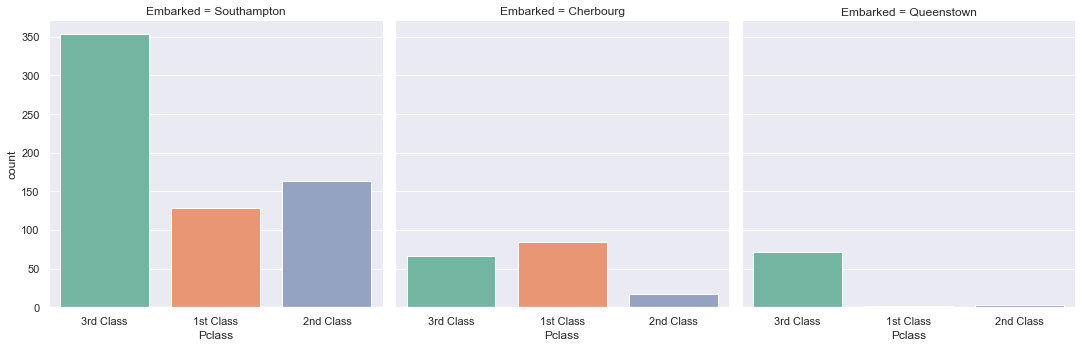

In [35]:
# Gráfico de sobreviventes por classe separados por origem do embarque
sns.catplot(x='Pclass', kind='count', col='Embarked', data=df_list_passenger)

In [62]:
porcentagem = (len(embarques_southampton)/len(df_list_passenger)) * 100
print(round(porcentagem, 2)

72.5

In [64]:
embarques_southampton = df_list_passenger.loc[(df_list_passenger['Embarked'] == 'Southampton')]
print('Total de pessoas que embarcaram em Southampton:', len(embarques_southampton))
print('Total de pessoas que embarcaram em Southampton da Primeira Class:', len(embarques_southampton[embarques_southampton['Pclass'] == '1st Class']))
print('Total de pessoas que embarcaram em Southampton da Segunda Class:', len(embarques_southampton[embarques_southampton['Pclass'] == '2nd Class']))
print('Total de pessoas que embarcaram em Southampton da Terceira Class:', len(embarques_southampton[embarques_southampton['Pclass'] == '3rd Class']))
print('Um total de', round(porcentagem, 2),'% do total de passageiros.')

Total de pessoas que embarcaram em Southampton: 646
Total de pessoas que embarcaram em Southampton da Primeira Class: 129
Total de pessoas que embarcaram em Southampton da Segunda Class: 164
Total de pessoas que embarcaram em Southampton da Terceira Class: 353
Um total de 72.5 % do total de passageiros.


- A maioria das pessoas embarcarem em **Southampton**, total de **646** pessoas

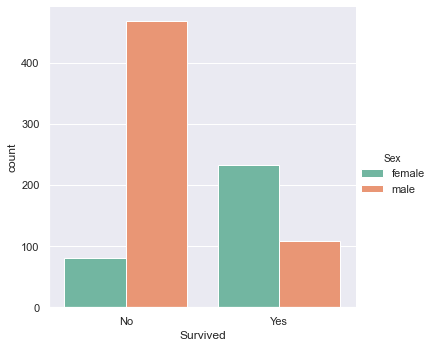

In [37]:
# Survived por Sex
sns.catplot(x='Survived', hue='Sex', kind='count', data=df_list_passenger)

In [38]:
mulheres_sobreviventes = sobreviventes[sobreviventes['Sex'] == 'female']
homens_mortos = nao_sobreviventes[nao_sobreviventes['Sex'] == 'male'] 
print('Total sobreviventes do sexo feminino:',len(mulheres_sobreviventes))
print('Total de mortos do sexo masculino:',len(homens_mortos))

Total sobreviventes do sexo feminino: 233
Total de mortos do sexo masculino: 468


- Entre os sobreviventes a **maioria eram mulheres**, totalizando **233** mulheres.
- Entre os mortos, estão a **maioria dos homens**, totalizando **468** homens.

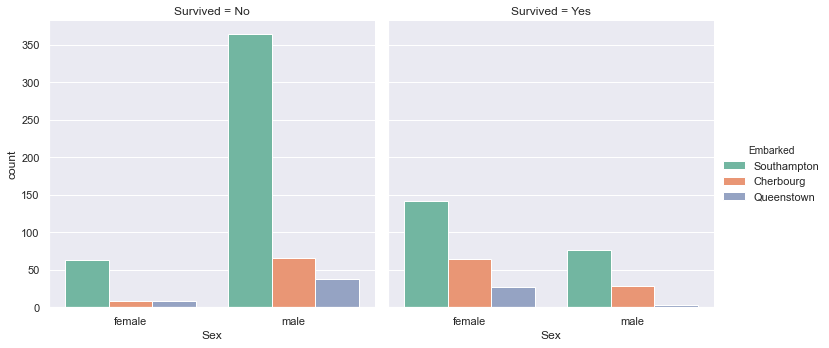

In [39]:
# Relação Survived com Age, separados por Sex
sns.catplot(x='Sex', hue='Embarked', col='Survived', kind='count', data=df_list_passenger)

In [73]:
total_mortos_southampton = embarques_southampton.loc[(embarques_southampton['Survived'] == 'No')]
porcentagem_mortos_southampton = round((len(total_mortos_southampton) / len(embarques_southampton))*100,2)
print(porcentagem_mortos_southampton, '% das pessoas que embacaram em Southampto, não sobreviveram.')

66.1 % das pessoas que embacaram em Southampto, não sobreviveram.
